CODE BLOCK: 1

In [1]:
!pip install -r requirements.txt
import model as model
import utils as utils


CODE BLOCK: 2

In [2]:
# CUDA?
utils.is_cuda()

CUDA Available? True


True

CODE BLOCK: 3

In [3]:
# Train data transformations
# Test data transformations
train_transforms, test_transforms = utils.create_data_transforms()

CODE BLOCK: 4

In [4]:
train_data, test_data = utils.get_MNIST_data('../data', train_transforms, test_transforms)

CODE BLOCK: 5

In [5]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

train_loader, test_loader = utils.create_data_loaders(train_data, test_data, **kwargs)

CODE BLOCK: 6

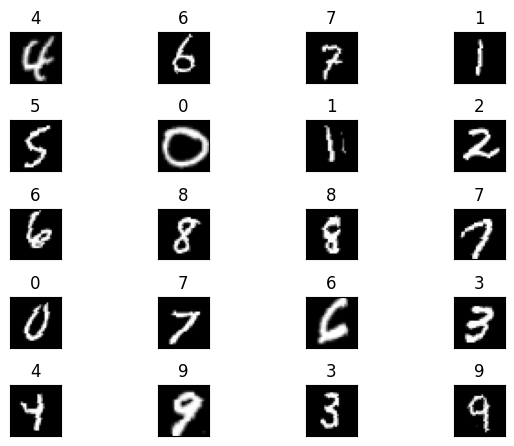

In [6]:
batch_data, batch_label = next(iter(train_loader))

utils.plotter(batch_data, batch_label, 5, 4)

CODE BLOCK: 7

In [7]:
model_obj = model.MyNet().to(utils.get_device())

model_obj.summary(size=(1, 28, 28))

CUDA Available? True
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


In [12]:

from torchviz import make_dot

batch = next(iter(train_loader))
model_obj.eval()
yhat = model_obj(batch[0].to(utils.get_device())) # Give dummy batch to forward().

make_dot(yhat, params=dict(list(model_obj.named_parameters()))).render("mnist", format="png")

CUDA Available? True


'mnist.png'

In [9]:
optimizer = utils.get_optimizer(model_obj.parameters(), lr=0.01, momentum=0.9)
scheduler = utils.get_scheduler(optimizer, step_size=3, gamma=0.1, verbose=True)

num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  model_obj.train_model(train_loader, optimizer)
  model_obj.test_model(test_loader)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=1.1892 Batch_id=117 Accuracy=36.93: 100%|██████████| 118/118 [00:32<00:00,  3.67it/s]


Test set: Average loss: 0.0016, Accuracy: 7756/10000 (77.56%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.2662 Batch_id=117 Accuracy=90.88: 100%|██████████| 118/118 [00:26<00:00,  4.45it/s]


Test set: Average loss: 0.0002, Accuracy: 9717/10000 (97.17%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1634 Batch_id=117 Accuracy=96.09: 100%|██████████| 118/118 [00:24<00:00,  4.78it/s]


Test set: Average loss: 0.0001, Accuracy: 9788/10000 (97.88%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 4


Train: Loss=0.0787 Batch_id=117 Accuracy=97.01: 100%|██████████| 118/118 [00:26<00:00,  4.53it/s]


Test set: Average loss: 0.0001, Accuracy: 9843/10000 (98.43%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 5


Train: Loss=0.0784 Batch_id=117 Accuracy=97.15: 100%|██████████| 118/118 [00:24<00:00,  4.73it/s]


Test set: Average loss: 0.0001, Accuracy: 9852/10000 (98.52%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 6


Train: Loss=0.1109 Batch_id=117 Accuracy=97.27: 100%|██████████| 118/118 [00:25<00:00,  4.68it/s]


Test set: Average loss: 0.0001, Accuracy: 9850/10000 (98.50%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 7


Train: Loss=0.0244 Batch_id=117 Accuracy=97.37: 100%|██████████| 118/118 [00:24<00:00,  4.73it/s]


Test set: Average loss: 0.0001, Accuracy: 9852/10000 (98.52%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 8


Train: Loss=0.0418 Batch_id=117 Accuracy=97.45: 100%|██████████| 118/118 [00:24<00:00,  4.78it/s]


Test set: Average loss: 0.0001, Accuracy: 9852/10000 (98.52%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 9


Train: Loss=0.1105 Batch_id=117 Accuracy=97.45: 100%|██████████| 118/118 [00:25<00:00,  4.68it/s]


Test set: Average loss: 0.0001, Accuracy: 9854/10000 (98.54%)

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch 10


Train: Loss=0.0705 Batch_id=117 Accuracy=97.42: 100%|██████████| 118/118 [00:26<00:00,  4.49it/s]


Test set: Average loss: 0.0001, Accuracy: 9854/10000 (98.54%)

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch 11


Train: Loss=0.0980 Batch_id=117 Accuracy=97.42: 100%|██████████| 118/118 [00:24<00:00,  4.86it/s]


Test set: Average loss: 0.0001, Accuracy: 9855/10000 (98.55%)

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch 12


Train: Loss=0.0842 Batch_id=117 Accuracy=97.37: 100%|██████████| 118/118 [00:24<00:00,  4.77it/s]


Test set: Average loss: 0.0001, Accuracy: 9855/10000 (98.55%)

Adjusting learning rate of group 0 to 1.0000e-06.
Epoch 13


Train: Loss=0.0577 Batch_id=117 Accuracy=97.53: 100%|██████████| 118/118 [00:24<00:00,  4.73it/s]


Test set: Average loss: 0.0001, Accuracy: 9855/10000 (98.55%)

Adjusting learning rate of group 0 to 1.0000e-06.
Epoch 14


Train: Loss=0.0414 Batch_id=117 Accuracy=97.50: 100%|██████████| 118/118 [00:24<00:00,  4.79it/s]


Test set: Average loss: 0.0001, Accuracy: 9855/10000 (98.55%)

Adjusting learning rate of group 0 to 1.0000e-06.
Epoch 15


Train: Loss=0.0125 Batch_id=117 Accuracy=97.41: 100%|██████████| 118/118 [00:24<00:00,  4.76it/s]


Test set: Average loss: 0.0001, Accuracy: 9855/10000 (98.55%)

Adjusting learning rate of group 0 to 1.0000e-07.
Epoch 16


Train: Loss=0.0465 Batch_id=117 Accuracy=97.43: 100%|██████████| 118/118 [00:24<00:00,  4.80it/s]


Test set: Average loss: 0.0001, Accuracy: 9855/10000 (98.55%)

Adjusting learning rate of group 0 to 1.0000e-07.
Epoch 17


Train: Loss=0.0298 Batch_id=117 Accuracy=97.47: 100%|██████████| 118/118 [00:24<00:00,  4.78it/s]


Test set: Average loss: 0.0001, Accuracy: 9855/10000 (98.55%)

Adjusting learning rate of group 0 to 1.0000e-07.
Epoch 18


Train: Loss=0.0880 Batch_id=117 Accuracy=97.42: 100%|██████████| 118/118 [00:25<00:00,  4.55it/s]


Test set: Average loss: 0.0001, Accuracy: 9855/10000 (98.55%)

Adjusting learning rate of group 0 to 1.0000e-08.
Epoch 19


Train: Loss=0.0493 Batch_id=117 Accuracy=97.40: 100%|██████████| 118/118 [00:24<00:00,  4.88it/s]


Test set: Average loss: 0.0001, Accuracy: 9855/10000 (98.55%)

Adjusting learning rate of group 0 to 1.0000e-08.
Epoch 20


Train: Loss=0.0311 Batch_id=117 Accuracy=97.39: 100%|██████████| 118/118 [00:24<00:00,  4.86it/s]


Test set: Average loss: 0.0001, Accuracy: 9855/10000 (98.55%)

Adjusting learning rate of group 0 to 1.0000e-08.


CODE BLOCK: 11

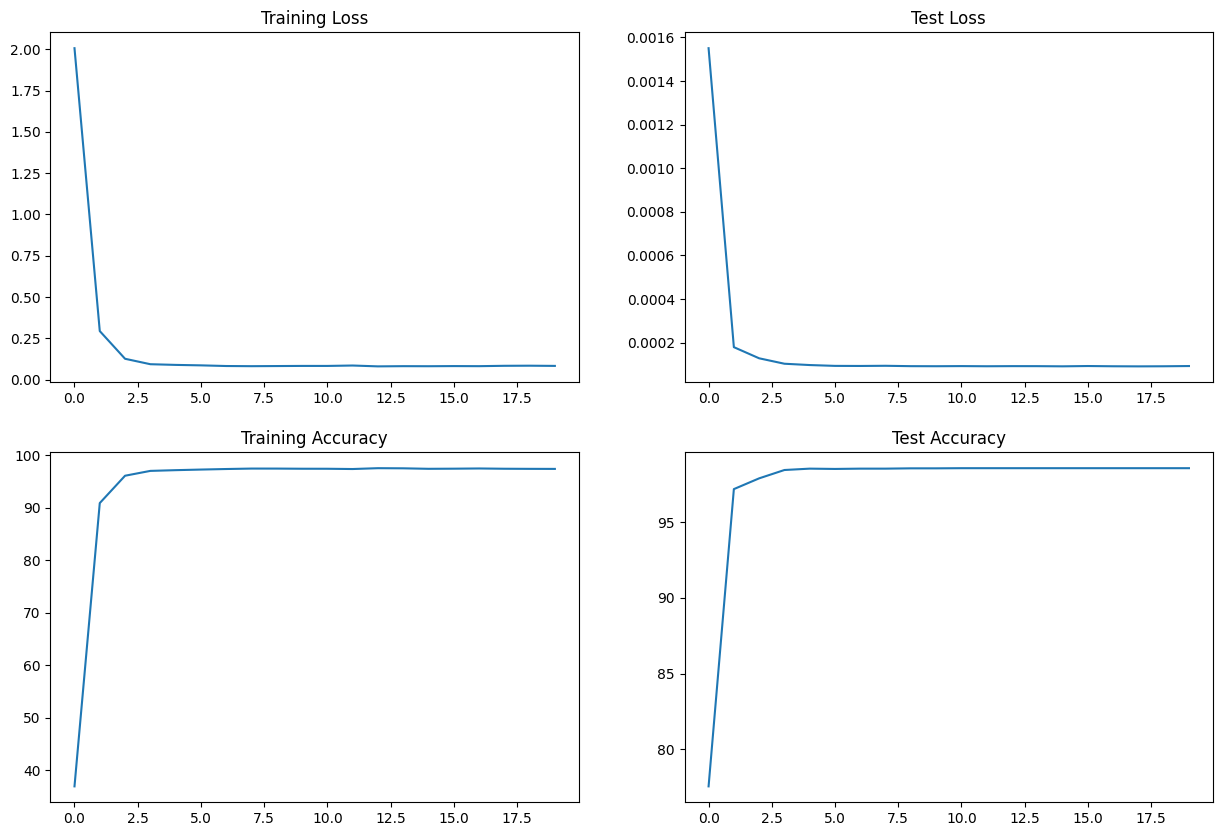

In [10]:
model_obj.my_plots(2, 2, (15,10))